In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import  AdaBoostClassifier
from sklearn.ensemble import  GradientBoostingClassifier

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
Data = pd.read_csv(r"F:\PCA_50_features\PCA_50_features.csv")
Data

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,231
0,25.022356,-6.799958,-5.016250,4.581315,-11.306539,4.426036,13.180123,2.459563,8.429075,-1.679232,...,-0.267965,-0.033910,-1.107760,-0.685061,0.584467,0.821474,0.709462,-0.498239,0.016951,0.0
1,-2.844736,-1.265252,1.738377,0.484612,0.022045,0.443640,-0.925560,-0.217946,0.753162,0.682743,...,0.007542,0.184258,-0.098010,0.121566,-0.111186,-0.746491,0.038035,-0.119754,0.093184,0.0
2,-3.071476,-1.015506,2.156695,-2.202537,-4.595725,1.106969,-2.112005,-0.310945,3.380887,-1.529304,...,-0.349426,-0.632636,0.014604,0.587698,0.154267,0.198887,0.001966,0.624264,0.068145,0.0
3,-4.920069,-1.329368,1.986788,-0.895050,2.066811,2.509160,-0.354943,0.878185,0.526922,1.098313,...,-0.289939,-0.153739,-0.083112,-0.078163,0.506903,0.076371,-0.216515,-0.036905,-0.369917,0.0
4,0.770259,-1.559405,2.545578,-1.118795,0.540490,3.438093,-0.584477,-2.273167,-3.289307,-0.905880,...,-0.138687,-0.455890,-0.243039,-0.050084,-0.337291,-0.299087,-0.465478,0.163042,0.087136,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47871,-7.751959,0.775206,-1.339623,-1.686491,1.232281,0.097654,0.221657,-0.863374,0.297561,-0.053956,...,-0.235280,-0.113446,0.814575,-0.261449,0.170903,0.221106,0.267184,-0.433643,0.458923,0.0
47872,-3.741647,-1.106958,-0.421251,-0.477359,0.693464,-0.077072,0.238473,1.366970,1.266009,-0.304988,...,-0.528106,-0.367886,-0.090466,0.639809,0.465343,-0.570838,0.232643,-0.072028,-0.510053,0.0
47873,-6.544203,1.804694,-1.886439,-1.361567,0.314316,-1.266477,-0.810861,0.313862,-1.334900,-0.490203,...,-0.420342,-0.505307,0.278991,0.161658,-0.269128,0.201929,0.163739,-0.138535,-0.209167,0.0
47874,19.540495,16.103253,-7.299638,-4.989192,3.433336,3.265255,0.011561,-0.609568,-0.453411,0.539367,...,0.138311,-0.054185,-0.010468,-0.055329,-0.014803,0.339775,0.253236,-0.012497,0.090463,0.0


In [3]:
Data.shape

(47876, 51)

## **Model Prepration**

# Brack Dataset

In [4]:
from sklearn.model_selection import train_test_split

X=Data.iloc[:,:-1].values
y=Data.iloc[:,-1].values

In [5]:
X.shape

(47876, 50)

In [6]:
y.shape

(47876,)

# Test and Train Dataset

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
X_test.shape

(14363, 50)

In [9]:
print('X_Train set shape is',format(X_train.shape))
print('X_Test set shape is',format(X_test.shape))

X_Train set shape is (33513, 50)
X_Test set shape is (14363, 50)


In [10]:
print('Y_Train set shape is',format(y_train.shape))
print('Y_Test set shape is',format(y_test.shape))

Y_Train set shape is (33513,)
Y_Test set shape is (14363,)


In [11]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(n_jobs=20,)
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.27%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.897313     0.704489  0.892698      0.800901      0.874735
recall         0.991990     0.143986  0.892698      0.567988      0.892698
f1-score       0.942279     0.239103  0.892698      0.590691      0.859945
support    29589.000000  3924.000000  0.892698  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29352   237]
 [ 3359   565]]

Test Result:
Accuracy Score: 88.96%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.894756     0.704663  0.889647      0.799709      0.871687
recall         0.990967     0.156053  0.889647      0.573510      0.889647
f1-score       0.940407     0.255519  0.889647      0.597963      0.857293
support   

# Confusion Matrix

Confusion Matrix for Training

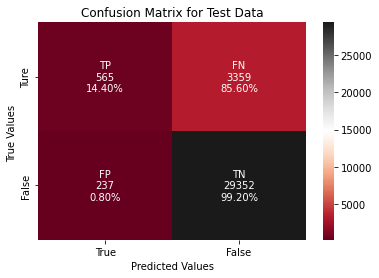

In [13]:
y_pred = lr_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

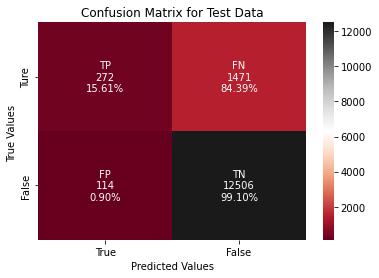

In [14]:
y_pred = lr_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))

group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8030612665691224

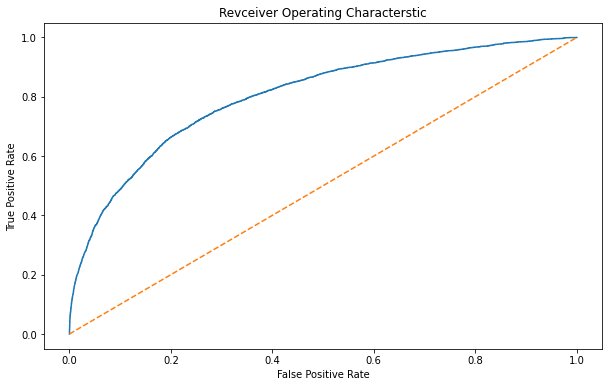

In [16]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7951839051928794

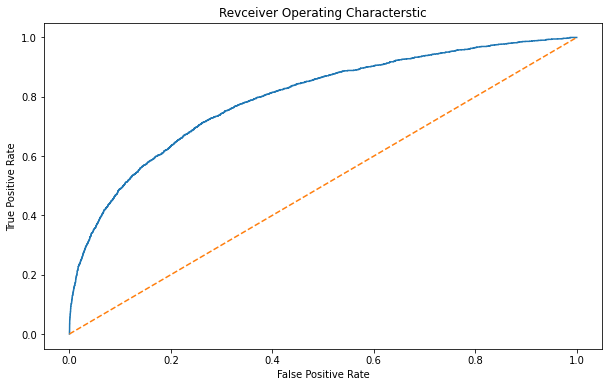

In [18]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [19]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["LogisticRegression", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701


## 2. K-nearest neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_neighbors=40, leaf_size=30)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.908254     0.914729  0.908453      0.911491      0.909012
recall         0.997026     0.240571  0.908453      0.618798      0.908453
f1-score       0.950572     0.380952  0.908453      0.665762      0.883876
support    29589.000000  3924.000000  0.908453  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29501    88]
 [ 2980   944]]

Test Result:
Accuracy Score: 90.42%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.903069     0.942169  0.904198      0.922619      0.907813
recall         0.998098     0.224326  0.904198      0.611212      0.904198
f1-score       0.948208     0.362373  0.904198      0.655290      0.877115
support   

# Confusion Matrix

Confusion Matrix for Training

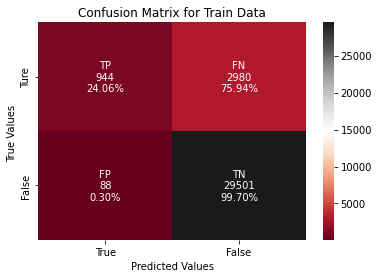

In [21]:
y_pred = knn_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

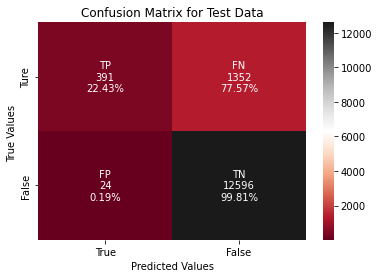

In [22]:
y_pred = knn_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve 

Roc Curve for Training

In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9159254983901262

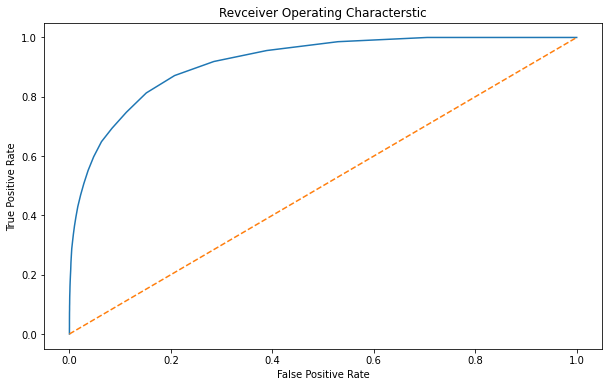

In [24]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8830867731737454

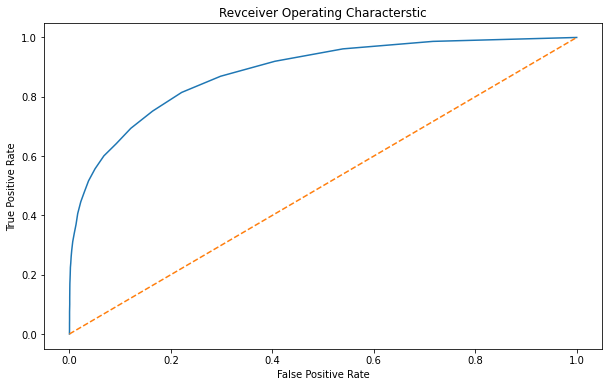

In [27]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

k-NN: Varying Number of Neighbors

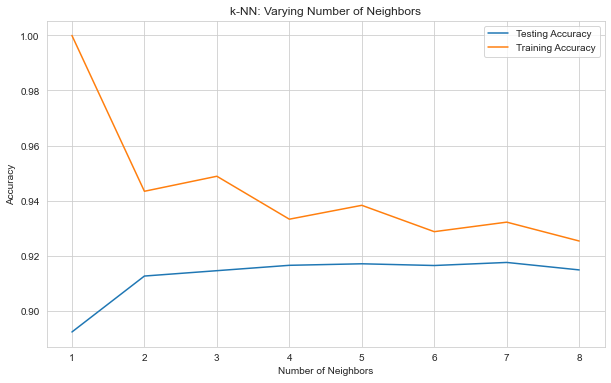

In [28]:
from sklearn.neighbors import KNeighborsClassifier
no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
test_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn_clf.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn_clf.score(X_train, y_train)

    # Compute accuracy on the testing set
    test_accuracy[i] = knn_clf.score(X_test, y_test)

# Visualization of k values vs accuracy
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [29]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\1715872608.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103


## 3. Support Vector machine

In [30]:
from sklearn.svm import SVC

svm_clf = SVC(probability=True, C=5,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 92.11%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.919584     0.955160  0.921075      0.937372      0.923749
recall         0.997871     0.341998  0.921075      0.669934      0.921075
f1-score       0.957129     0.503659  0.921075      0.730394      0.904033
support    29589.000000  3924.000000  0.921075  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29526    63]
 [ 2582  1342]]

Test Result:
Accuracy Score: 90.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.908572     0.924419  0.909142      0.916495      0.910495
recall         0.996910     0.273666  0.909142      0.635288      0.909142
f1-score       0.950693     0.422311  0.909142      0.686502      0.886572
support   

# Confusion Matrix

Confusion Matrix for Training 

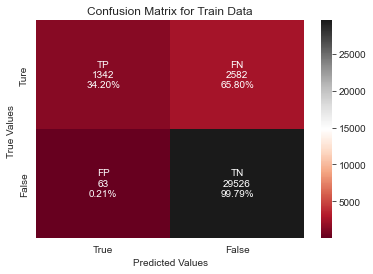

In [31]:
y_pred = svm_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

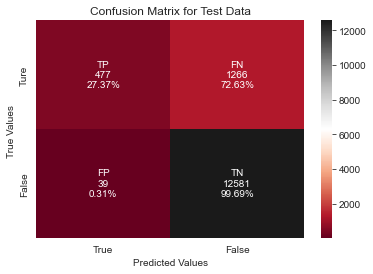

In [32]:
y_pred = svm_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9201459502489576

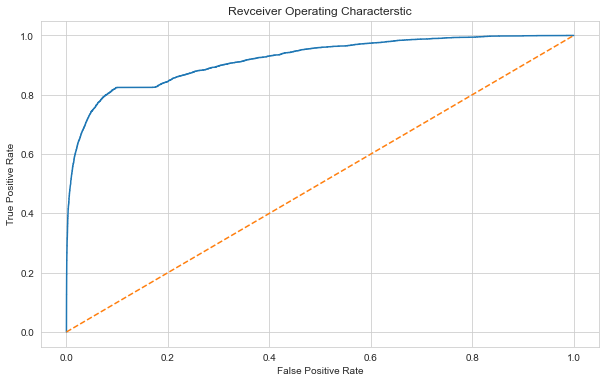

In [34]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [35]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8796107227188126

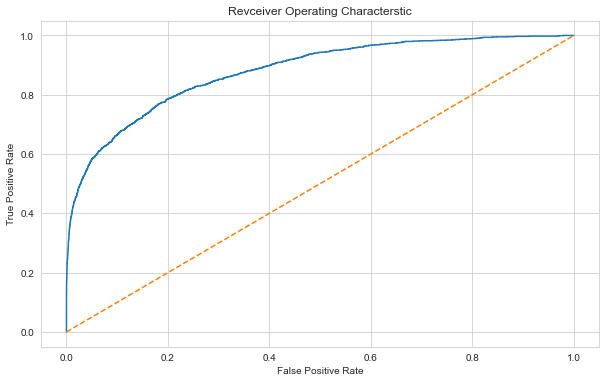

In [36]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [37]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\1471490544.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154


# 4. LGBMClassifier

In [38]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
lgbmc_clf = LGBMClassifier(int = 10,) 
lgbmc_clf.fit(X_train, y_train)

print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbmc_clf, X_train, y_train, X_test, y_test, train=False)

[LightGBM] [Warning] Unknown parameter: int
Train Result:
Accuracy Score: 94.45%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.943253     0.961952  0.944499      0.952602      0.945442
recall         0.997127     0.547655  0.944499      0.772391      0.944499
f1-score       0.969442     0.697954  0.944499      0.833698      0.937654
support    29589.000000  3924.000000  0.944499  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29504    85]
 [ 1775  2149]]

Test Result:
Accuracy Score: 91.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.921436     0.877763  0.919098      0.899600      0.916136
recall         0.992552     0.387263  0.919098      0.689907      0.919098
f1-score       0.955673     0.537420  0.9

# Confusion Matrix

Confusion Matrix for Training

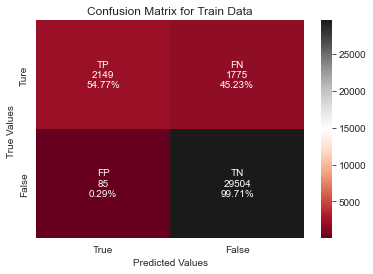

In [39]:
y_pred = lgbmc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

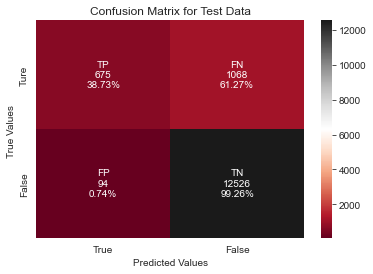

In [40]:
y_pred = lgbmc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [41]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9779110838535506

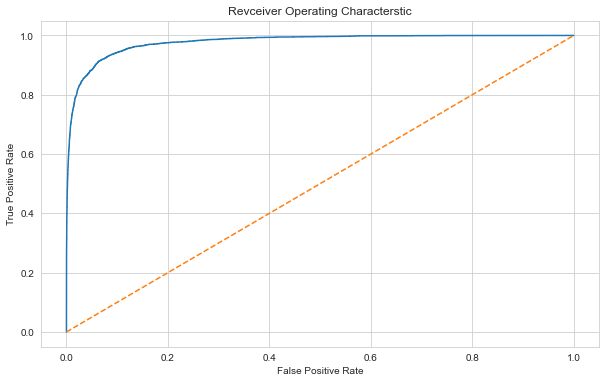

In [42]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [43]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lgbmc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,threshold_lgbmc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9034124726208433

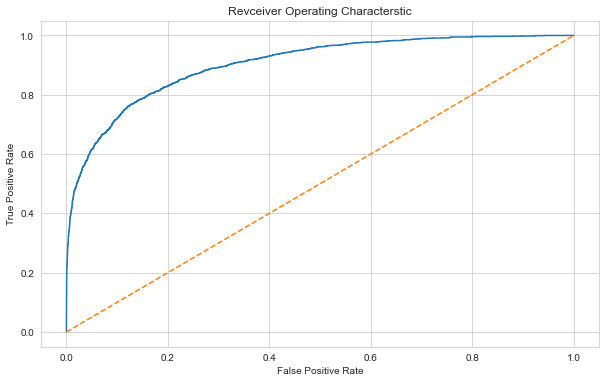

In [44]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [45]:
test_score = accuracy_score(y_test, lgbmc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbmc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LGBMClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\2900492383.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768


## 5. Decision Tree Classifier 

In [46]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100,)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 89.49%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.907561     0.630619  0.894877      0.769090      0.875135
recall         0.980837     0.246687  0.894877      0.613762      0.894877
f1-score       0.942778     0.354644  0.894877      0.648711      0.873914
support    29589.000000  3924.000000  0.894877  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29022   567]
 [ 2956   968]]

Test Result:
Accuracy Score: 88.30%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.898921     0.548387  0.883033      0.723654      0.856382
recall         0.976704     0.204819  0.883033      0.590761      0.883033
f1-score       0.936199     0.298246  0.883033      0.617222      0.858781
support   

# Confusion Matrix

Confusion Matrix for Training 

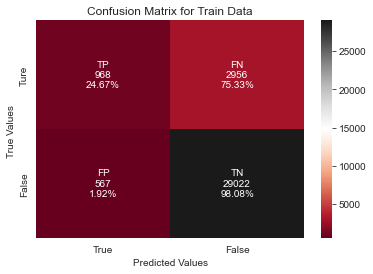

In [47]:
y_pred = tree_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

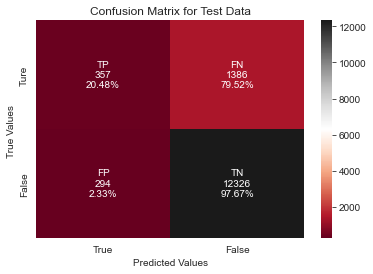

In [48]:
y_pred = tree_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8775412240456744

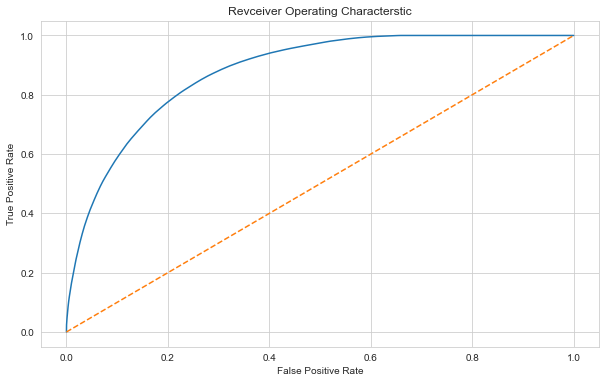

In [50]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [51]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7936657201593333

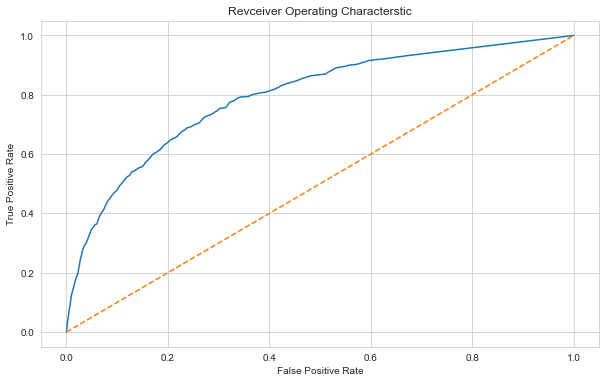

In [52]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [53]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\490717132.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279


## 6. Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(min_samples_split=10, min_samples_leaf=100,)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.57%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.885391     0.989474  0.885686      0.937432      0.897578
recall         0.999966     0.023955  0.885686      0.511961      0.885686
f1-score       0.939197     0.046778  0.885686      0.492988      0.834705
support    29589.000000  3924.000000  0.885686  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29588     1]
 [ 3830    94]]

Test Result:
Accuracy Score: 88.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.880608     1.000000  0.880874      0.940304      0.895097
recall         1.000000     0.018359  0.880874      0.509180      0.880874
f1-score       0.936514     0.036056  0.880874      0.486285      0.827241
support   

# Confusion Matrix

Confusion Matrix for Training

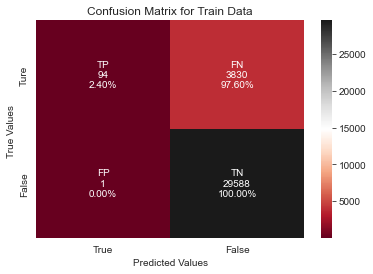

In [55]:
y_pred = rf_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

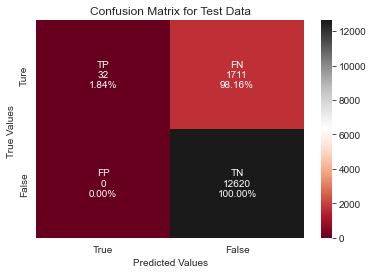

In [56]:
y_pred = rf_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9221452485528119

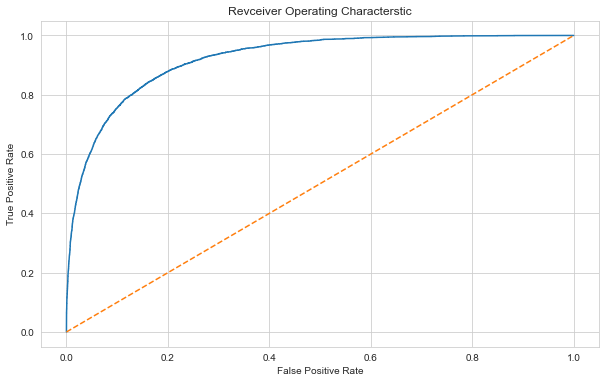

In [58]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [59]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8679866397898589

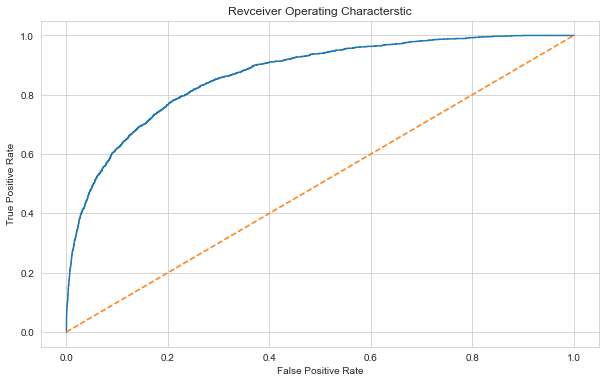

In [60]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [61]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\2869621319.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447


## 7. XGBoost Classifer

In [62]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:39:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 98.80%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.987246     0.994664  0.988034      0.990955      0.988115
recall         0.999358     0.902650  0.988034      0.951004      0.988034
f1-score       0.993265     0.946426  0.988034      0.969846      0.987781
support    29589.000000  3924.000000  0.988034  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29570    19]
 [  382  3542]]

Test Result:
Accuracy Score: 92.26%
_______________________________________________
CLASSIFICATION REPORT:


# Confusion Matrix

Confusion Matrix for Training

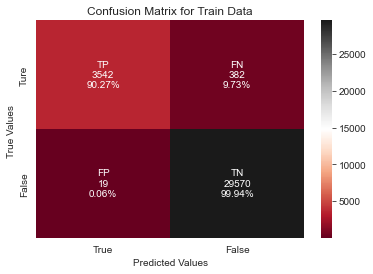

In [63]:
y_pred = xgb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

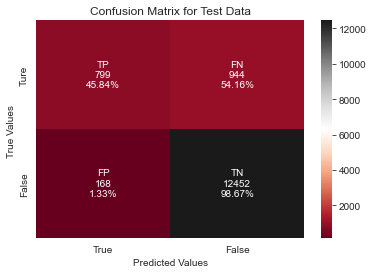

In [64]:
y_pred = xgb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9989246148276237

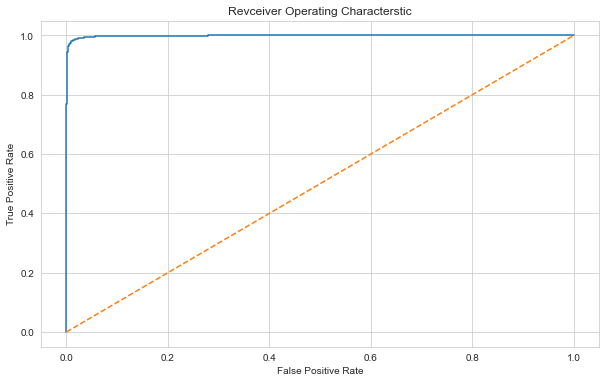

In [66]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [67]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9048952886483675

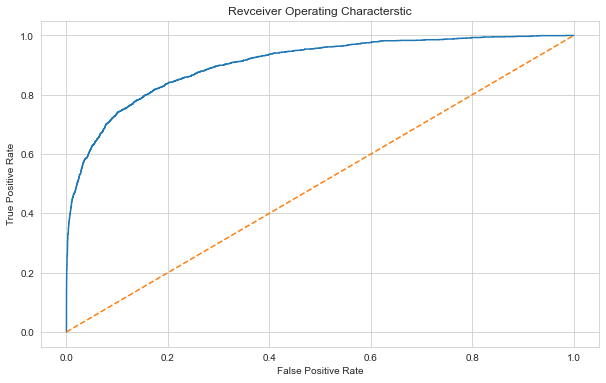

In [68]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [69]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\3415439063.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447
6,XGBoost Classifier,98.803449,92.257885


# 8. AdaBoostClassifier

In [70]:
from sklearn.ensemble import AdaBoostClassifier
ab_clf = AdaBoostClassifier(n_estimators=20,)
ab_clf.fit(X_train, y_train)

print_score(ab_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ab_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.91%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.895887     0.623656  0.889088      0.759771      0.864012
recall         0.989354     0.133028  0.889088      0.561191      0.889088
f1-score       0.940304     0.219282  0.889088      0.579793      0.855880
support    29589.000000  3924.000000  0.889088  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29274   315]
 [ 3402   522]]

Test Result:
Accuracy Score: 88.72%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.892633     0.673239   0.88721      0.782936      0.866009
recall         0.990808     0.137120   0.88721      0.563964      0.887210
f1-score       0.939162     0.227836   0.88721      0.583499      0.852840
support   

# Confusion Matrix

Confusion Matrix for Training

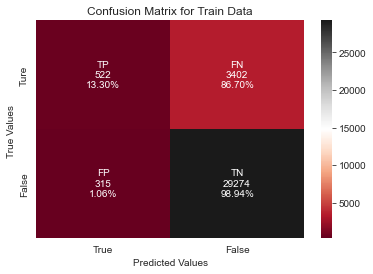

In [71]:
y_pred = ab_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

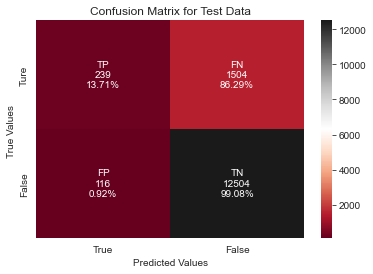

In [72]:
y_pred = ab_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.798178969655259

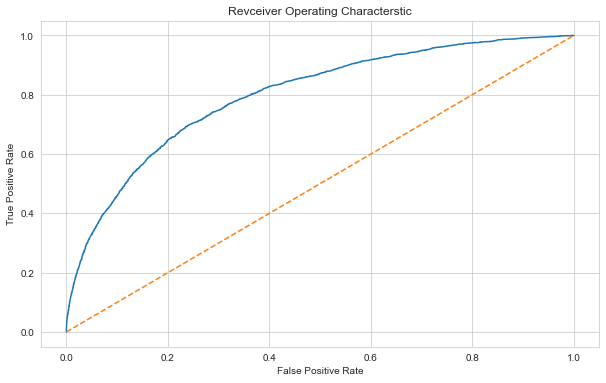

In [74]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [75]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = ab_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_ab_clf,true_positive_rate_ab_clf,threshold_ab_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.777875231967035

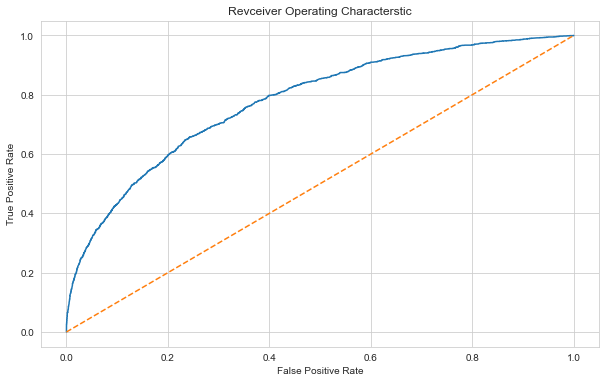

In [76]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [77]:
test_score = accuracy_score(y_test, ab_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ab_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["AdaBoostClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\2629595934.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447
6,XGBoost Classifier,98.803449,92.257885
7,AdaBoostClassifier,88.908782,88.721019


# 9. GradientBoostingClassifier

In [78]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier( min_samples_split=30, min_samples_leaf=10,)
gb_clf.fit(X_train, y_train)

print_score(gb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 90.79%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.908301     0.895184  0.907886      0.901743      0.906765
recall         0.996249     0.241590  0.907886      0.618919      0.907886
f1-score       0.950244     0.380494  0.907886      0.665369      0.883533
support    29589.000000  3924.000000  0.907886  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29478   111]
 [ 2976   948]]

Test Result:
Accuracy Score: 90.09%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.901060     0.893827  0.900856      0.897444      0.900183
recall         0.996593     0.207688  0.900856      0.602140      0.900856
f1-score       0.946422     0.337058  0.900856      0.641740      0.872473
support   

# Confusion Matrix

Confusion Matrix for Training

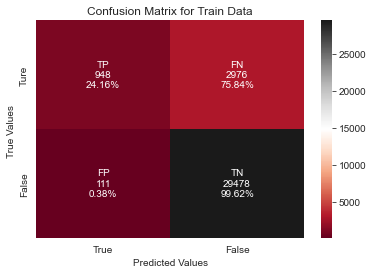

In [79]:
y_pred = gb_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

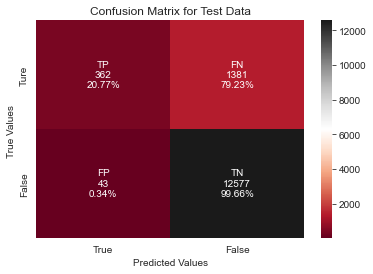

In [80]:
y_pred = gb_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8957371183997525

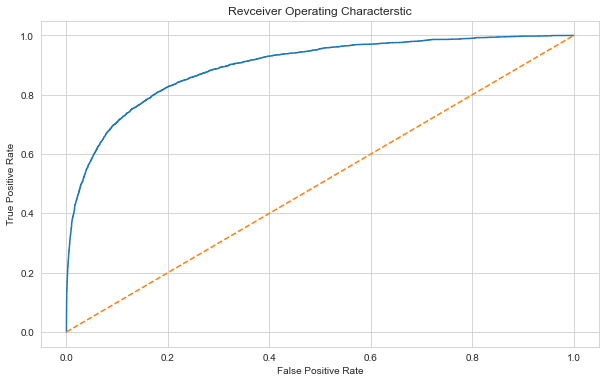

In [82]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [83]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = gb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_gb_clf,true_positive_rate_gb_clf,threshold_gb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8580377202720777

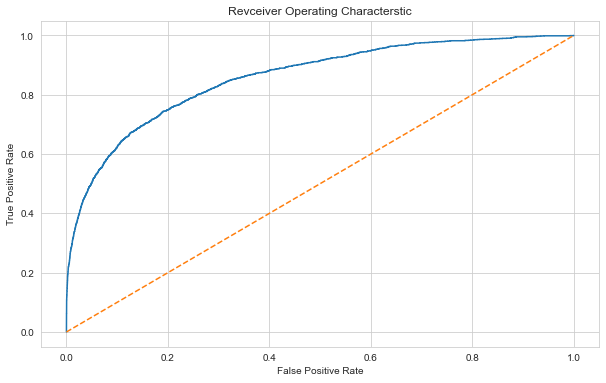

In [84]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_gb_clf, true_positive_rate_gb_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [85]:
test_score = accuracy_score(y_test, gb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["GradientBoostingClassifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\646985266.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447
6,XGBoost Classifier,98.803449,92.257885
7,AdaBoostClassifier,88.908782,88.721019
8,GradientBoostingClassifier,90.788649,90.085637


# 10. ExtraTreesClassifier

In [86]:
from sklearn.ensemble import ExtraTreesClassifier
etc_clf = ExtraTreesClassifier(n_estimators=100,max_depth=10)
etc_clf.fit(X_train, y_train)

print_score(etc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(etc_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.34%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.883386     1.000000  0.883448      0.941693      0.897040
recall         1.000000     0.004587  0.883448      0.502294      0.883448
f1-score       0.938083     0.009132  0.883448      0.473607      0.829313
support    29589.000000  3924.000000  0.883448  33513.000000  33513.000000
_______________________________________________
Confusion Matrix: 
 [[29589     0]
 [ 3906    18]]

Test Result:
Accuracy Score: 87.86%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0     1.0  accuracy     macro avg  weighted avg
precision      0.878647     0.0  0.878647      0.439323      0.772020
recall         1.000000     0.0  0.878647      0.500000      0.878647
f1-score       0.935404     0.0  0.878647      0.467702      0.821889
support    12620.000000  1743.

C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\siddh\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Confusion Matrix

Confusion Matrix for Training

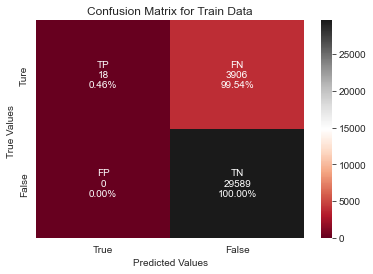

In [87]:
y_pred = etc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

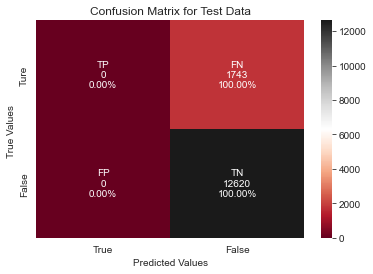

In [88]:
y_pred = etc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Roc Curve

Roc Curve for Training

In [89]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.9143830622236154

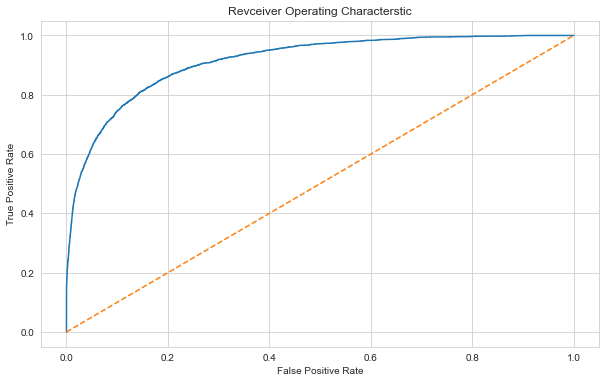

In [90]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [91]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = etc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_etc_clf,true_positive_rate_etc_clf,threshold_etc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8504560692396027

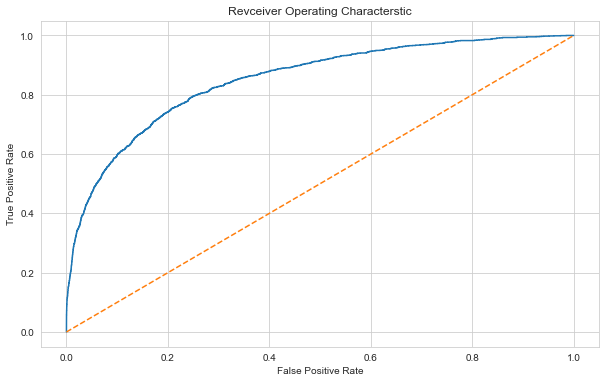

In [92]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [93]:
test_score = accuracy_score(y_test, etc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, etc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ExtraTreesClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\1027888236.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447
6,XGBoost Classifier,98.803449,92.257885
7,AdaBoostClassifier,88.908782,88.721019
8,GradientBoostingClassifier,90.788649,90.085637
9,ExtraTreesClassifier,88.344821,87.864652


# 11. CatBoostClassifier

In [94]:
from catboost import CatBoostClassifier
cbc_clf = CatBoostClassifier(n_estimators=10)
cbc_clf.fit(X_train, y_train)

print_score(cbc_clf, X_train, y_train, X_test, y_test, train=True)
print_score(cbc_clf, X_train, y_train, X_test, y_test, train=False)

Learning rate set to 0.5
0:	learn: 0.4161856	total: 181ms	remaining: 1.63s
1:	learn: 0.3401786	total: 213ms	remaining: 854ms
2:	learn: 0.3175473	total: 334ms	remaining: 780ms
3:	learn: 0.3036296	total: 409ms	remaining: 613ms
4:	learn: 0.2936815	total: 445ms	remaining: 445ms
5:	learn: 0.2863219	total: 525ms	remaining: 350ms
6:	learn: 0.2779399	total: 563ms	remaining: 241ms
7:	learn: 0.2704716	total: 592ms	remaining: 148ms
8:	learn: 0.2651942	total: 622ms	remaining: 69.1ms
9:	learn: 0.2608369	total: 652ms	remaining: 0us
Train Result:
Accuracy Score: 90.18%
_______________________________________________
CLASSIFICATION REPORT:
                    0.0          1.0  accuracy     macro avg  weighted avg
precision      0.903316     0.846491  0.901769      0.874904      0.896662
recall         0.995269     0.196738  0.901769      0.596003      0.901769
f1-score       0.947065     0.319272  0.901769      0.633169      0.873558
support    29589.000000  3924.000000  0.901769  33513.000000  33513.

# Confusion Matrix

Confusion Matrix for Training

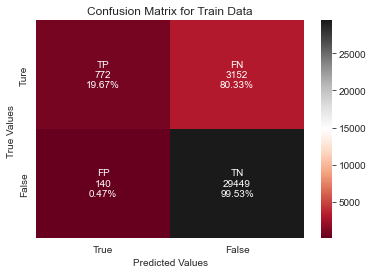

In [95]:
y_pred = cbc_clf.predict(X_train)
cf_matrix = confusion_matrix(y_train, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_train, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Train Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

Confusion Matrix for Testing

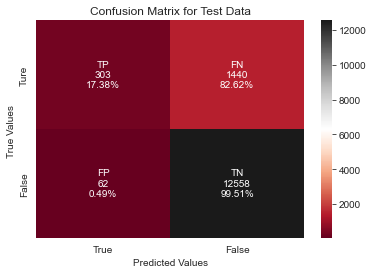

In [96]:
y_pred = cbc_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred,labels=(1,0))
group_names = ['TP','FN','FP','TN']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
tp, fn, fp, tn = confusion_matrix(y_test, y_pred, labels=(1,0)).ravel()                

group_percentages = ["{0:.2%}".format(tp/(tp+fn)), "{0:.2%}".format(fn/(tp+fn)), "{0:.2%}".format(fp/(fp+tn)), "{0:.2%}".format(tn/(fp+tn))]


labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='RdGy')

ax.set_title('Confusion Matrix for Test Data');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('True Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['True','False'])
ax.yaxis.set_ticklabels(['Ture','False'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Roc Curve

Roc Curve for Training

In [97]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_train)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_train,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_train,y_probabilities)

0.8560174923120207

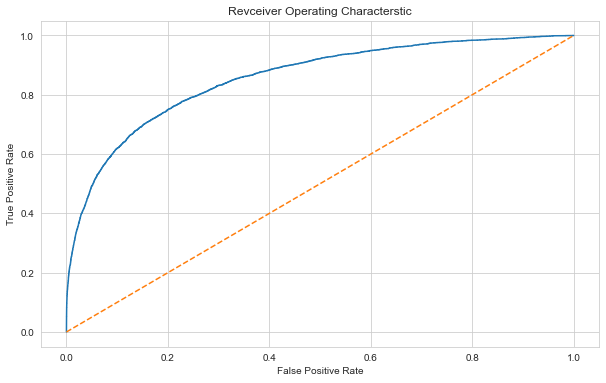

In [98]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Roc Curve for Testing

In [99]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = cbc_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,threshold_cbc_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8328590567840753

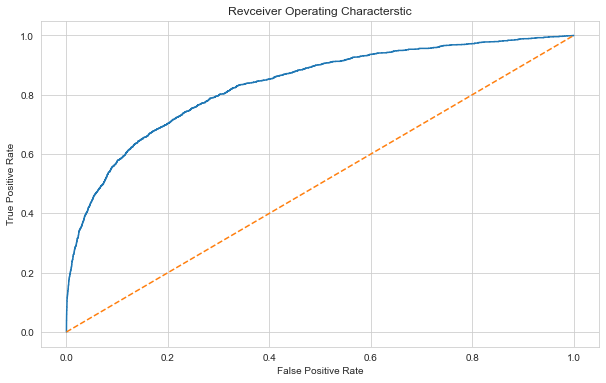

In [100]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)
plt.plot([0,1],ls='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [101]:
test_score = accuracy_score(y_test, cbc_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, cbc_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["CatBoostClassifier", train_score, test_score]], columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

C:\Users\siddh\AppData\Local\Temp\ipykernel_15088\292123774.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(results_df_2, ignore_index=True)


,Model,Training Accuracy %,Testing Accuracy %
0,LogisticRegression,89.269836,88.964701
1,K-nearest neighbors,92.528273,91.478103
2,Support Vector Machine,92.107540,90.914154
3,LGBMClassifier,94.449915,91.909768
4,Decision Tree Classifier,89.487662,88.303279
5,Random Forest Classifier,88.568615,88.087447
6,XGBoost Classifier,98.803449,92.257885
7,AdaBoostClassifier,88.908782,88.721019
8,GradientBoostingClassifier,90.788649,90.085637
9,ExtraTreesClassifier,88.344821,87.864652


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

In [102]:
from sklearn.metrics import auc

auc_lr=auc(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
auc_knn=auc(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
auc_svm=auc(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
auc_lgbmc=auc(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf)
auc_tree=auc(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
auc_rf=auc(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
auc_xgb=auc(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
auc_ab=auc(false_positive_rate_ab_clf,true_positive_rate_ab_clf)
auc_gb=auc(false_positive_rate_gb_clf,true_positive_rate_gb_clf)
auc_etc=auc(false_positive_rate_etc_clf,true_positive_rate_etc_clf)
auc_cbc=auc(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf)

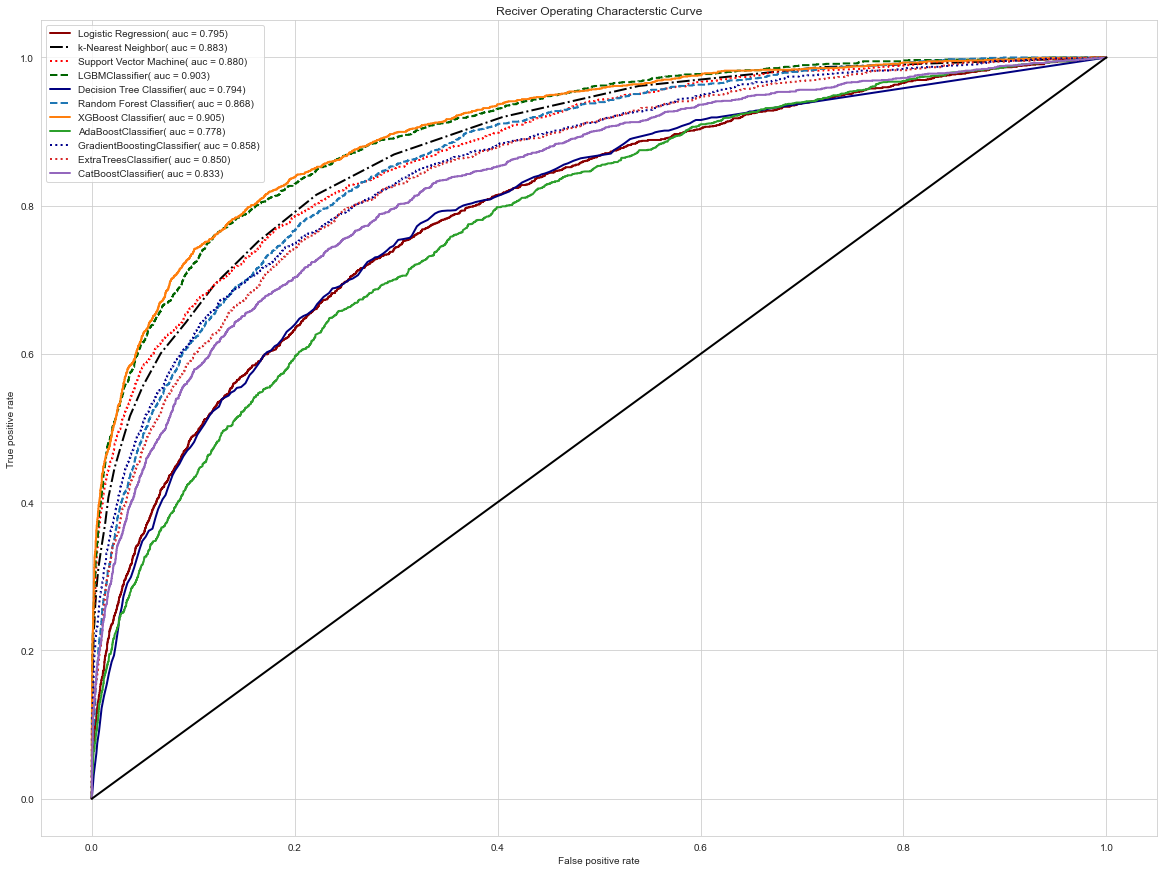

In [103]:
#Plot All ROC Curve`s

sns.set_style('whitegrid')
plt.figure(figsize=(20,15))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,linewidth=2,color="darkred",linestyle='-',label='Logistic Regression( auc = %0.3f)' % auc_lr)
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,linewidth=2,color="black",linestyle='-.',label='k-Nearest Neighbor( auc = %0.3f)' % auc_knn)
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,linewidth=2,color="red",linestyle=':',label='Support Vector Machine( auc = %0.3f)' % auc_svm)
plt.plot(false_positive_rate_lgbmc_clf,true_positive_rate_lgbmc_clf,linewidth=2,color="darkgreen",linestyle='dashed',label='LGBMClassifier( auc = %0.3f)' % auc_lgbmc)
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,linewidth=2,color="navy",linestyle='solid',label='Decision Tree Classifier( auc = %0.3f)' % auc_tree)
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,linewidth=2,linestyle='--',label='Random Forest Classifier( auc = %0.3f)' % auc_rf)
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,linewidth=2,linestyle='-',label='XGBoost Classifier( auc = %0.3f)' % auc_xgb)
plt.plot(false_positive_rate_ab_clf,true_positive_rate_ab_clf,linewidth=2,linestyle='-',label='AdaBoostClassifier( auc = %0.3f)' % auc_ab)
plt.plot(false_positive_rate_gb_clf,true_positive_rate_gb_clf,linewidth=2,color="darkblue",linestyle='dotted',label='GradientBoostingClassifier( auc = %0.3f)' % auc_gb)
plt.plot(false_positive_rate_etc_clf,true_positive_rate_etc_clf,linewidth=2,linestyle=':',label='ExtraTreesClassifier( auc = %0.3f)' % auc_etc)
plt.plot(false_positive_rate_cbc_clf,true_positive_rate_cbc_clf,linewidth=2,linestyle='solid',label='CatBoostClassifier( auc = %0.3f)' % auc_cbc)

plt.plot([0,1],linewidth=2,color="black",linestyle='-')
#plt.plot([0,0],[1,0],c='.1')
#plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()